## Predictions and model objects

In this chapter, you’ll discover how to use linear regression models to make predictions on Taiwanese house prices and Facebook advert clicks. You’ll also grow your regression skills as you get hands-on with model objects, understand the concept of "regression to the mean", and learn how to transform variables in a dataset.

### Predicting house prices
Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and you get a prediction for the corresponding response variable. The code flow is as follows.

explanatory_data <- tibble(explanatory_var = some_values)

explanatory_data %>% mutate(response_var = predict(model, explanatory_data))

Here, you'll make predictions for the house prices in the Taiwan real estate dataset.

In [3]:
# libraries
library(fst)
library(ggplot2)
library(dplyr)
# read and see data 
taiwan_real_estate = read_fst("taiwan_real_estate.fst")
# linear regression model of house price versus number of convenience 
mdl_price_vs_conv = lm(price_twd_msq ~ n_convenience, data = taiwan_real_estate)

# From previous steps
explanatory_data <- tibble(n_convenience = 0:10)

# Edit this, so predictions are stored in prediction_data
predict(mdl_price_vs_conv, explanatory_data)

# See the result
prediction_data <- explanatory_data %>%
  mutate(price_twd_msq = predict(mdl_price_vs_conv, explanatory_data))

prediction_data


1         2         3         4         5         6         7         8 
 8.224237  9.022317  9.820397 10.618477 11.416556 12.214636 13.012716 13.810795 
        9        10        11 
14.608875 15.406955 16.205035

n_convenience,price_twd_msq
0,8.224237
1,9.022317
2,9.820397
3,10.618477
4,11.416556
5,12.214636
6,13.012716
7,13.810795
8,14.608875
9,15.406955


### Visualizing predictions
The prediction data you calculated contains a column of explanatory variable values and a column of response variable values. That means you can plot it on the same scatter plot of response versus explanatory data values.

`geom_smooth()` using formula 'y ~ x'


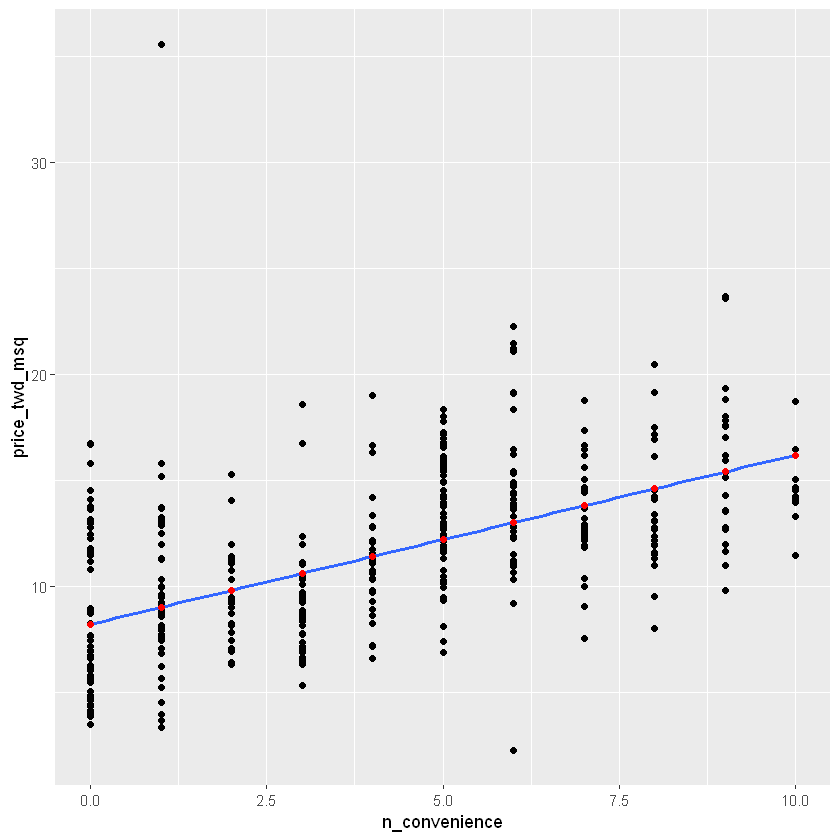

In [4]:
# Add to the plot
ggplot(taiwan_real_estate, aes(n_convenience, price_twd_msq)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add a point layer of prediction data, colored yellow
  geom_point(data = prediction_data, color = "red")

### The limits of prediction
In the last exercise you made predictions on some sensible, could-happen-in-real-life, situations. That is, the cases when the number of nearby convenience stores were between zero and ten. To test the limits of the model's ability to predict, try some impossible situations.

Use the console to try predicting house prices from mdl_price_vs_conv when there are -1 convenience stores. Do the same for 2.5 convenience stores. What happens in each case?

`geom_smooth()` using formula 'y ~ x'
`geom_smooth()` using formula 'y ~ x'


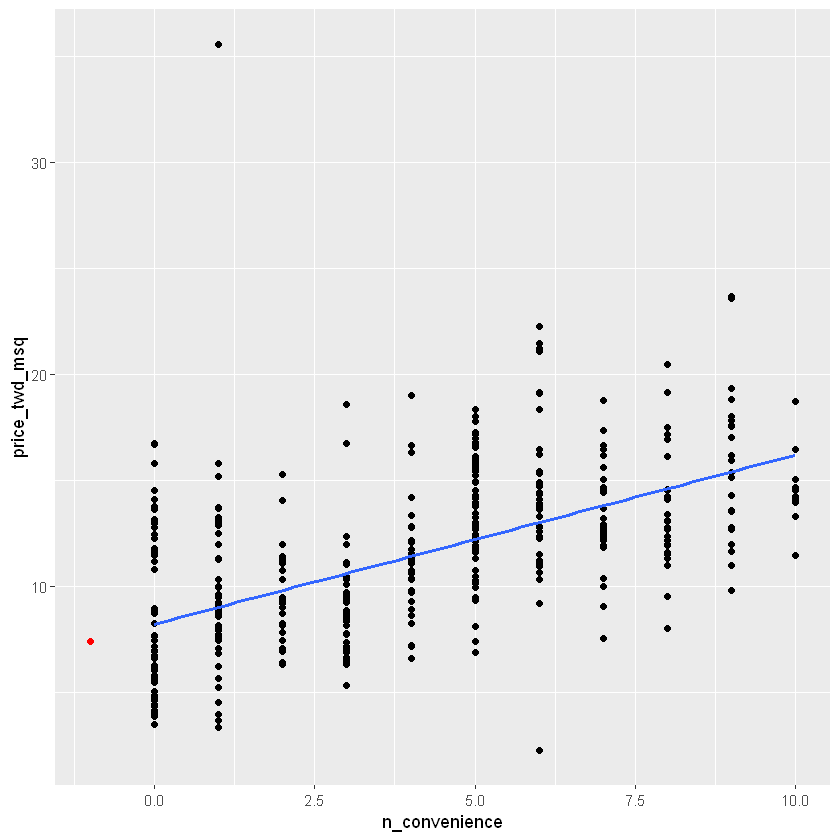

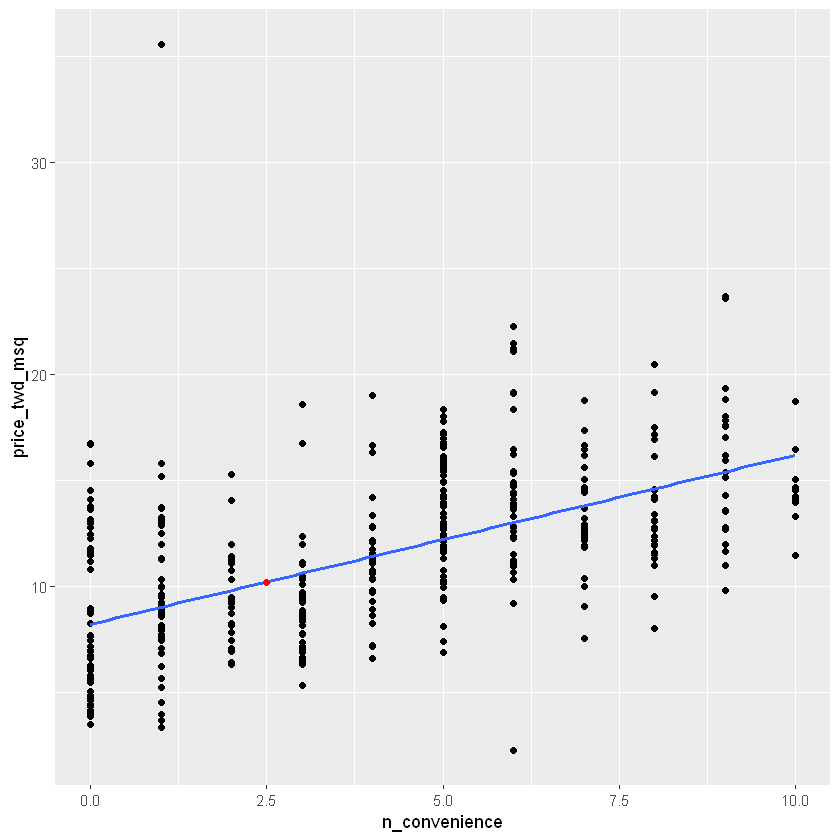

In [5]:
minus_one <- tibble(n_convenience = -1)
two_pt_five <- tibble(n_convenience = 2.5)

# See the result -1
prediction_data_minus_1 <- minus_one %>%
  mutate(price_twd_msq = predict(mdl_price_vs_conv, minus_one))

# See the result 2.5
prediction_data_two_pt_five <- two_pt_five %>%
  mutate(price_twd_msq = predict(mdl_price_vs_conv, two_pt_five))

# Add to the plot 
ggplot(taiwan_real_estate, aes(n_convenience, price_twd_msq)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add a point layer of prediction data, colored yellow
  geom_point(data = prediction_data_minus_1, color = "red")

# Add to the plot
ggplot(taiwan_real_estate, aes(n_convenience, price_twd_msq)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add a point layer of prediction data, colored yellow
  geom_point(data = prediction_data_two_pt_five, color = "red")

Linear models don't know what is possible or not in real life. That means that they can give you predictions that don't make any sense when applied to your data. You need to understand what your data means in order to determine whether a prediction is nonsense or not.

### Extracting model elements
The variable returned by lm() that contains the model object has many elements. In order to perform further analysis on the model results, you need to extract the useful bits of it. The model coefficients, the fitted values, and the residuals are perhaps the most important bits of the linear model object.

In [6]:
  # Get the model coefficients of mdl_price_vs_conv
coefficients(mdl_price_vs_conv)

(Intercept) n_convenience 
    8.2242375     0.7980797

In [7]:
# Get the fitted values of mdl_price_vs_conv
fitted(mdl_price_vs_conv)

1         2         3         4         5         6         7         8 
16.205035 15.406955 12.214636 12.214636 12.214636 10.618477 13.810795 13.012716 
        9        10        11        12        13        14        15        16 
 9.022317 10.618477  9.022317 15.406955 12.214636 11.416556 11.416556  9.820397 
       17        18        19        20        21        22        23        24 
13.012716  9.022317 14.608875 13.810795 10.618477 13.810795  9.022317 13.810795 
       25        26        27        28        29        30        31        32 
11.416556  9.820397 12.214636 12.214636 11.416556 12.214636  8.224237 13.810795 
       33        34        35        36        37        38        39        40 
 9.022317 13.012716 13.810795  8.224237  9.820397  9.022317 13.012716 12.214636 
       41        42        43        44        45        46        47        48 
 8.224237  8.224237 12.214636 13.012716 11.416556 14.608875 15.406955 10.618477 
       49        50        51        52        53        54        55        56 
 8.224237  9.022317 11.416556  9.022317 10.618477 12.214636 12.214636  8.224237 
       57        58        59        60        61        62        63        64 
14.608875 13.810795  9.022317 12.214636  9.820397 13.012716 10.618477 11.416556 
       65        66        67        68        69        70        71        72 
 8.224237 14.608875 13.012716 12.214636 13.012716 12.214636 15.406955 10.618477 
       73        74        75        76        77        78        79        80 
14.608875  8.224237 16.205035  9.022317 10.618477 10.618477  9.820397  9.022317 
       81        82        83        84        85        86        87        88 
11.416556 13.012716 13.810795 10.618477 13.810795 15.406955  9.022317  8.224237 
       89        90        91        92        93        94        95        96 
 8.224237  8.224237  9.022317  8.224237 11.416556  8.224237 12.214636 12.214636 
       97        98        99       100       101       102       103       104 
15.406955 10.618477 12.214636 15.406955 11.416556  9.022317 13.012716 13.012716 
      105       106       107       108       109       110       111       112 
13.012716 13.012716 14.608875  9.022317  9.820397 10.618477 12.214636 13.810795 
      113       114       115       116       117       118       119       120 
10.618477 13.012716 14.608875  9.820397  9.022317  8.224237 10.618477 12.214636 
      121       122       123       124       125       126       127       128 
12.214636 12.214636 11.416556  8.224237 13.810795 13.012716 11.416556 12.214636 
      129       130       131       132       133       134       135       136 
13.012716 13.810795 14.608875 10.618477 12.214636 14.608875 13.012716  8.224237 
      137       138       139       140       141       142       143       144 
12.214636 13.012716  8.224237 12.214636 12.214636 10.618477 12.214636 12.214636 
      145       146       147       148       149       150       151       152 
 9.022317 12.214636  8.224237 14.608875  8.224237 14.608875 13.810795 15.406955 
      153       154       155       156       157       158       159       160 
 9.022317 13.012716  8.224237  8.224237  8.224237 11.416556 12.214636 11.416556 
      161       162       163       164       165       166       167       168 
14.608875 10.618477  8.224237 12.214636  8.224237  9.022317 13.012716 14.608875 
      169       170       171       172       173       174       175       176 
12.214636  9.022317  8.224237 12.214636 15.406955 11.416556 13.810795 10.618477 
      177       178       179       180       181       182       183       184 
 8.224237 15.406955 11.416556  9.022317  8.224237 14.608875 10.618477  8.224237 
      185       186       187       188       189       190       191       192 
 8.224237 10.618477 10.618477  8.224237 14.608875  8.224237 14.608875  9.820397 
      193       194       195       196       197       198       199       200 
13.810795 12.214636  8.224237 12.214636

In [12]:
# Get the residuals of mdl_price_vs_conv
residuals(mdl_price_vs_conv)

1             2             3             4             5 
 -4.737561094  -2.638422376   2.097012981   4.366301937   0.826211165 
            6             7             8             9            10 
 -0.905919870  -1.617149478   1.117390148  -3.333966186  -3.931638479 
           11            12            13            14            15 
  3.504157868   2.172470211  -0.323561906  -4.215346032  -1.038341493 
           16            17            18            19            20 
  5.459482085   8.197571691   2.293870425  -1.810085473   0.621882292 
           21            22            23            24            25 
 -1.753121081   1.801912549  -1.579049393   0.682396664   0.323231880 
           26            27            28            29            30 
 -1.650956644   4.789902542  -2.048221512   2.804321139   5.062217217 
           31            32            33            34            35 
 -1.537399329  -6.246498949   1.325640471   1.904076986   2.860914062 
           36            37            38            39            40 
  0.035974348  -2.891501273  -1.367249091   1.419962009   1.764183934 
           41            42            43            44            45 
 -3.413344866  -2.717429586  -1.715392466  -2.695015299   4.892066979 
           46            47            48            49            50 
 -3.020372916  -2.698936748   7.989692838  -4.169774518  -5.028368607 
           51            52            53            54            55 
  1.957119929  -2.759079650  -2.449036361  -0.444590650   3.428329168 
           56            57            58            59            60 
 -4.079002960  -1.931114217   2.376799085  -2.184193115   0.614410863 
           61            62            63            64            65 
 -3.375616251   6.109825851  -2.237236058   5.224896026  -0.569169374 
           66            67            68            69            70 
 -1.204941751   2.327677591   4.971445659  -2.059614391   0.493382118 
           71            72            73            74            75 
  2.444784886   1.726455319  -3.625516638  -2.172800236   0.254874610 
           76            77            78            79            80 
 -0.096447275   0.516167875  -2.872636966  -0.803755434  -1.004162858 
           81            82            83            84            85 
  0.777089672  -1.878071274   0.742911036  -5.262954666  -0.588405151 
           86            87            88            89            90 
 -0.036304373  -0.852876927  -2.687172400   6.299211866  -0.569169374 
           91            92            93            94            95 
  4.714445312   4.846866935  -4.820489753  -3.352830494   0.190810258 
           96            97            98            99           100 
  3.458586354   2.596070816  -0.149490218   3.216528866   3.413014841 
          101           102           103           104           105 
  0.141688764   0.932297051   3.447193476   0.814818287  -3.784273998 
          106           107           108           109           110 
  8.469886366  -0.357740541  -0.973905672   0.497303568  -2.025435755 
          111           112           113           114           115 
  3.398071982  -1.889464153  -3.629066618 -10.713169610   1.518204996 
          116           117           118           119           120 
  4.218937456  -5.330940467  -4.290803262  -1.359777662   5.818646869 
          121           122           123           124           125 
 -2.744136792   2.308813283  -1.582970843   5.542782214   3.556829342 
          126           127           128           129           130 
  1.692276683   7.615213726   4.426816309   5.353396199  -1.405349176 
          131           132           133           134           135 
 -3.262430405  -1.329520476  -0.868191255  -2.657286683  -0.244183226 
          136           137           138           139           140 
 -1.930742748   1.945727050   1.329190450   4.937638493   0.644668049 
          141           142         

In [13]:
# Print a summary of mdl_price_vs_conv
summary(mdl_price_vs_conv)


Call:
lm(formula = price_twd_msq ~ n_convenience, data = taiwan_real_estate)

Residuals:
     Min       1Q   Median       3Q      Max 
-10.7132  -2.2213  -0.5409   1.8105  26.5299 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)    8.22424    0.28500   28.86   <2e-16 ***
n_convenience  0.79808    0.05653   14.12   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.384 on 412 degrees of freedom
Multiple R-squared:  0.326,	Adjusted R-squared:  0.3244 
F-statistic: 199.3 on 1 and 412 DF,  p-value: < 2.2e-16


### Manually predicting house prices
You can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use predict(), but doing this manually is helpful to reassure yourself that predictions aren't magic – they are simply arithmetic.

In fact, for a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.

In [14]:
# Get the coefficients of mdl_price_vs_conv
coeffs <- coefficients(mdl_price_vs_conv)

# Get the intercept
intercept <- coeffs[1]

# Get the slope
slope <- coeffs[2]

explanatory_data %>% 
  mutate(
    # Manually calculate the predictions
    price_twd_msq = intercept + slope * n_convenience
  )

# Compare to the results from predict()
predict(mdl_price_vs_conv, explanatory_data)

n_convenience,price_twd_msq
0,8.224237
1,9.022317
2,9.820397
3,10.618477
4,11.416556
5,12.214636
6,13.012716
7,13.810795
8,14.608875
9,15.406955


1         2         3         4         5         6         7         8 
 8.224237  9.022317  9.820397 10.618477 11.416556 12.214636 13.012716 13.810795 
        9        10        11 
14.608875 15.406955 16.205035

### Using broom
Many programming tasks are easier if you keep all your data inside data frames. This is particularly true if you are a tidyverse fan, where dplyr and ggplot2 require you to use data frames. The broom package contains functions that decompose models into three data frames: one for the coefficient-level elements (the coefficients themselves, as well as p-values for each coefficient), the observation-level elements (like fitted values and residuals), and the model-level elements (mostly performance metrics).

The functions in broom are generic. That is, they work with many model types, not just linear regression model objects. They also work with logistic regression model objects (as you'll see in Chapter 4), and many other types of model.

In [16]:
library(broom)
# Get the coefficient-level elements of the model
tidy(mdl_price_vs_conv)


term,estimate,std.error,statistic,p.value
(Intercept),8.2242375,0.28499836,28.85714,5.807884e-101
n_convenience,0.7980797,0.05652919,14.11801,3.413483e-37


In [18]:
# Get the observation-level elements of the model
head(augment(mdl_price_vs_conv))

price_twd_msq,n_convenience,.fitted,.resid,.hat,.sigma,.cooksd,.std.resid
11.467474,10,16.20503,-4.7375611,0.012148997,3.379833,1.220128e-02,-1.4086178
12.768533,9,15.40695,-2.6384224,0.009131801,3.385478,2.827167e-03,-0.7832862
14.311649,5,12.21464,2.0970130,0.002644427,3.386418,5.104721e-04,0.6205263
16.580938,5,12.21464,4.3663019,0.002644427,3.381131,2.213081e-03,1.2920307
13.040847,5,12.21464,0.8262112,0.002644427,3.387756,7.924135e-05,0.2444838
9.712557,3,10.61848,-0.9059199,0.002749584,3.387706,9.907779e-05,-0.2680845


In [21]:
# Get the model-level elements of the model
glance(mdl_price_vs_conv)

r.squared,adj.r.squared,sigma,statistic,p.value,df,logLik,AIC,BIC,deviance,df.residual,nobs
0.3260466,0.3244108,3.383888,199.3182,3.413483e-37,1,-1091.115,2188.229,2200.307,4717.686,412,414


### Transforming the explanatory variable
If there is no straight line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.

You'll take another look at the Taiwan real estate dataset, this time using the distance to the nearest MRT (metro) station as the explanatory variable. You'll use code to make every commuter's dream come true: shortening the distance to the metro station by taking the square root. Take that, geography!

`geom_smooth()` using formula 'y ~ x'


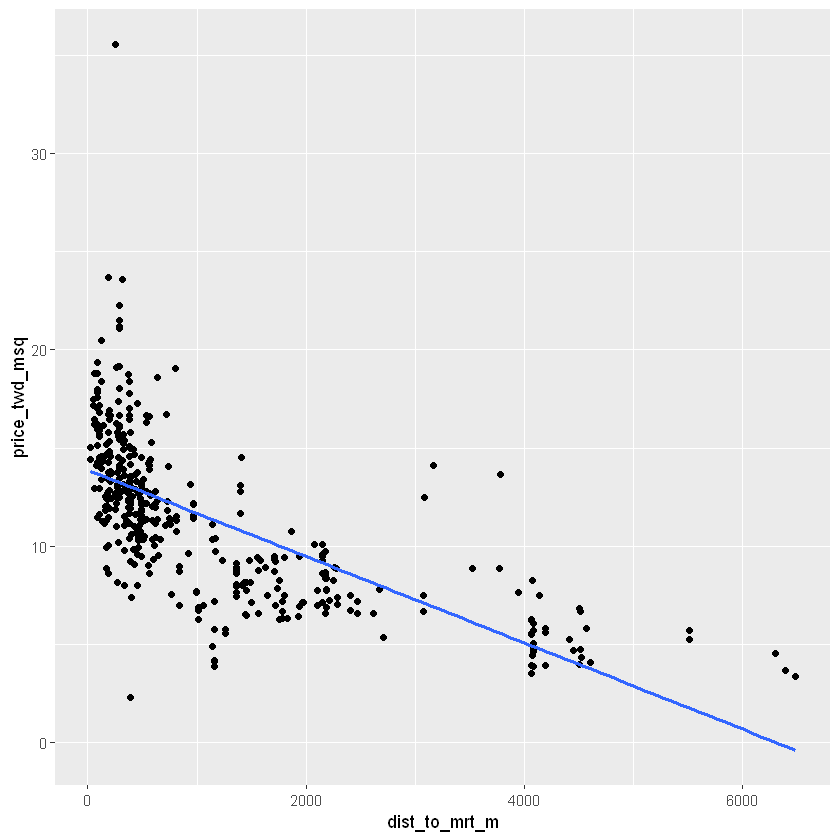

In [24]:
# Run the code to see the plot
ggplot(taiwan_real_estate, aes(dist_to_mrt_m, price_twd_msq)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula 'y ~ x'


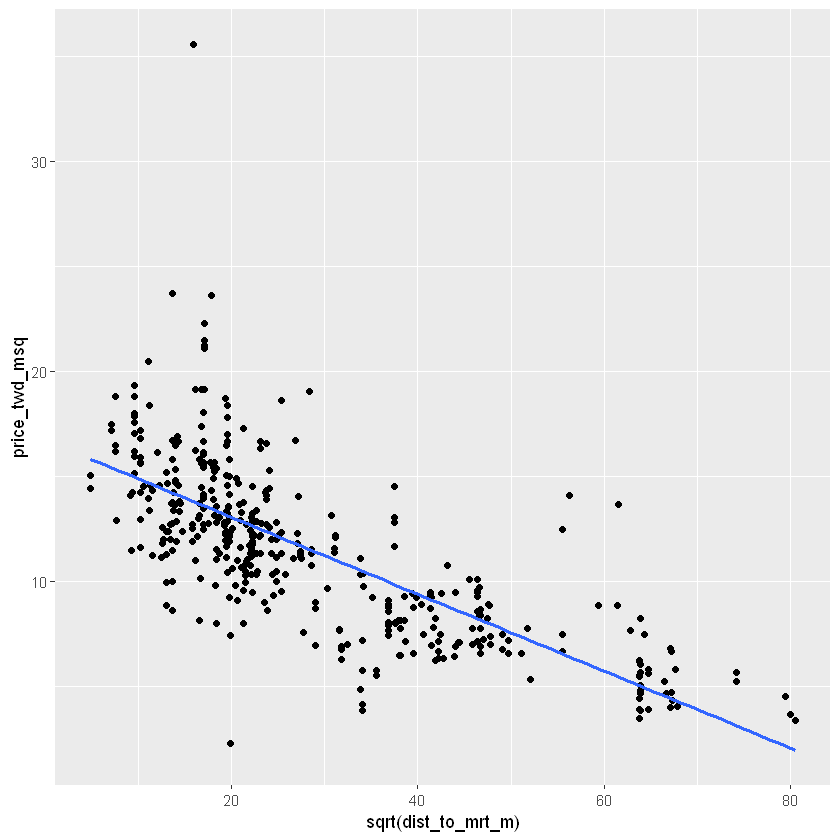

In [25]:
# Edit so x-axis is square root of dist_to_mrt_m
ggplot(taiwan_real_estate, aes(sqrt(dist_to_mrt_m), price_twd_msq)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

In [26]:
# Run a linear regression of price_twd_msq vs. 
# square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist <-lm(price_twd_msq ~ sqrt(dist_to_mrt_m), data = taiwan_real_estate)

# See the result
mdl_price_vs_dist


Call:
lm(formula = price_twd_msq ~ sqrt(dist_to_mrt_m), data = taiwan_real_estate)

Coefficients:
        (Intercept)  sqrt(dist_to_mrt_m)  
            16.7098              -0.1828  


In [27]:
# Use this explanatory data
explanatory_data <- tibble(
  dist_to_mrt_m = seq(0, 80, 10) ^ 2
)

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data <- explanatory_data %>%
mutate(price_twd_msq = predict(mdl_price_vs_dist, explanatory_data))

# See the result
prediction_data

dist_to_mrt_m,price_twd_msq
0,16.709799
100,14.881370
400,13.052942
900,11.224513
1600,9.396085
2500,7.567656
3600,5.739227
4900,3.910799
6400,2.082370


`geom_smooth()` using formula 'y ~ x'


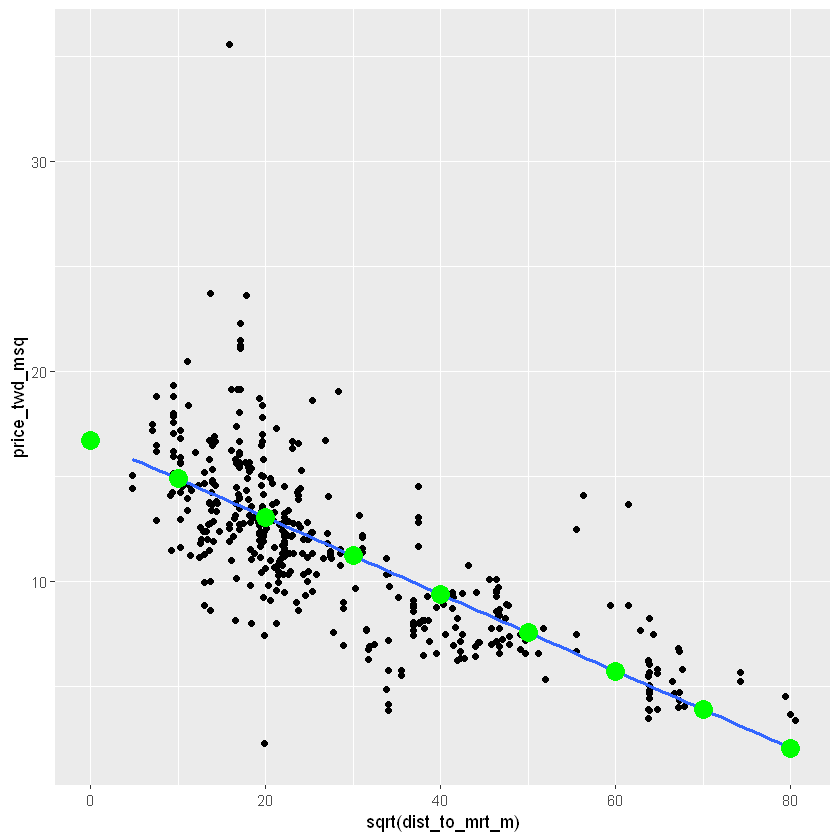

In [28]:
# plot 

ggplot(taiwan_real_estate, aes(sqrt(dist_to_mrt_m), price_twd_msq)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add points from prediction_data, colored green, size 5
  geom_point(data = prediction_data, color = "green", size = 5)

### Transforming the response variable too
The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

In the video, you saw the first step of the digital advertising workflow: spending money to buy ads, and counting how many people see them (the "impressions"). The next step is determining how many people click on the advert after seeing it.

`geom_smooth()` using formula 'y ~ x'


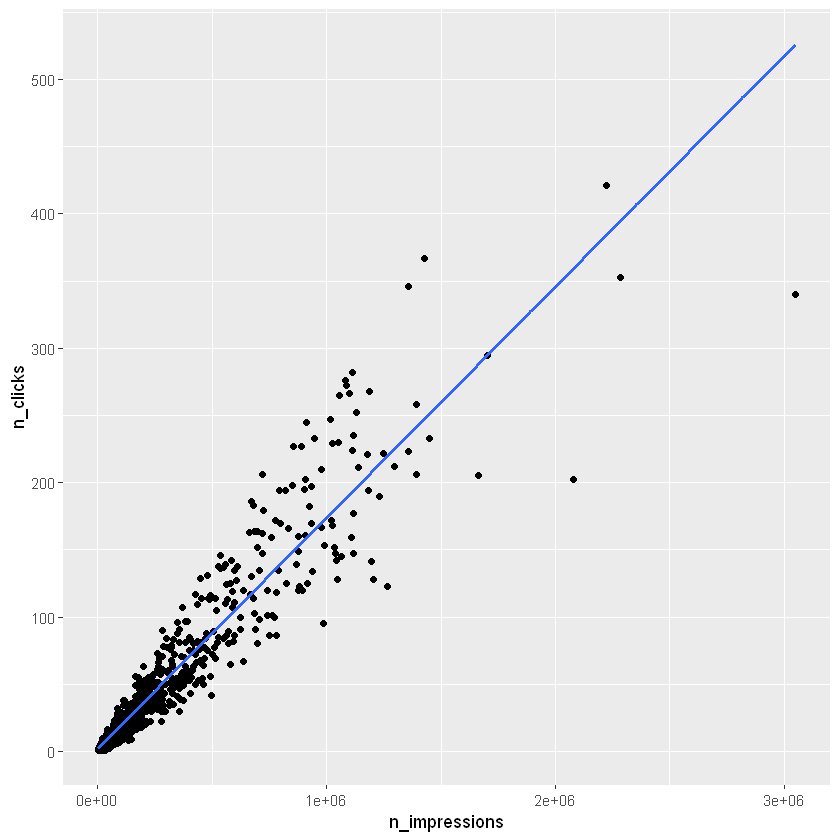

In [29]:
# read and see data 
ad_conversion = read_fst("ad_conversion.fst")

# Run the code to see the plot
# Edit to raise x, y aesthetics to power 0.25
ggplot(ad_conversion, aes(n_impressions, n_clicks)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula 'y ~ x'


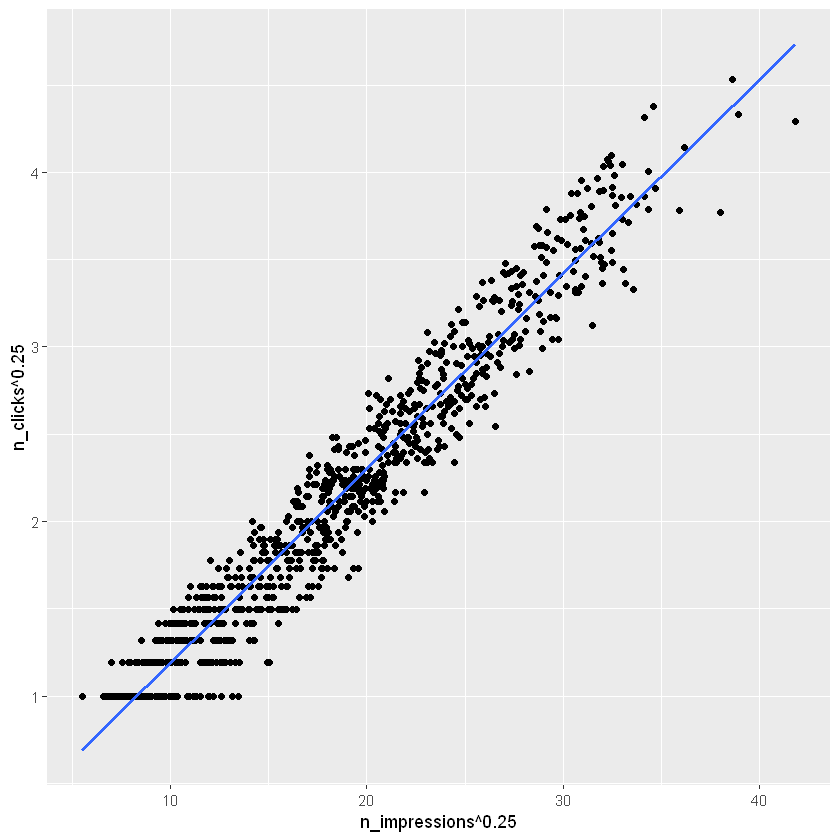

In [30]:
# Edit to raise x, y aesthetics to power 0.25
ggplot(ad_conversion, aes(n_impressions^0.25, n_clicks^0.25)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula 'y ~ x'


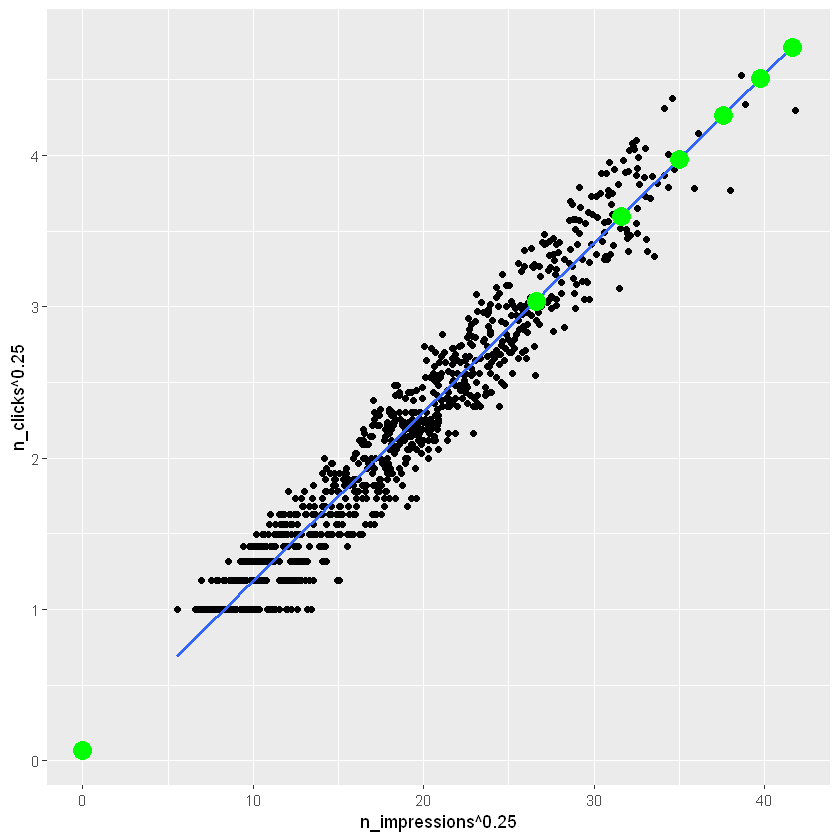

In [32]:
# Run a linear regression of n_clicks to the power 0.25 vs. 
# n_impressions to the power 0.25 using ad_conversion
mdl_click_vs_impression <- lm(I(n_clicks^0.25) ~ I(n_impressions ^0.25), data = ad_conversion)

# Use this explanatory data
explanatory_data <- tibble(
  n_impressions = seq(0, 3e6, 5e5)
)

prediction_data <- explanatory_data %>% 
  mutate(
    # Use mdl_click_vs_impression to predict n_clicks ^ 0.25
    n_clicks_025 = predict(mdl_click_vs_impression, explanatory_data),
    # Back transform to get n_clicks
    n_clicks = n_clicks_025 ^4
  )

# PLOT
ggplot(ad_conversion, aes(n_impressions ^ 0.25, n_clicks ^ 0.25)) +
  geom_point() +
  geom_smooth(method = "lm", se = FALSE) +
  # Add points from prediction_data, colored green
  geom_point(data = prediction_data, color = "green", size = 5)